# Summary

Repeat attempt at deriving Lagrangian correctly parameterized in terms of $v^x$ and $v^z$.

### Preliminaries

In [1]:
import sympy as sy, numpy as np, os
sy.init_printing(pretty_print=True,wrap_line=True)
from sympy import simplify, trigsimp, expand, factor, powsimp, \
    Eq, solve, solveset, sqrt, diff, Matrix, det, tan, cos, sin, sec, csc, \
    Abs, Rational, pi, re, im, atan, atan2, numer, denom, \
    lambdify, log, collect, cancel, integrate, Integral, \
    nroots, poly, N

from gmplib.utils import e2d
from gme.symbols import *
from gme.equations import Equations

from gmplib.plot_utils import GraphingBase


from functools import reduce

from scipy.optimize import root_scalar
from scipy.linalg import norm

# Won't work for eta<1
# rdotz = symbols('v^z',  real=True, positive=True)

In [2]:
# from notebook.services.config import ConfigManager
# cm = ConfigManager().update('notebook', {'limit_output': 20000})

In [3]:
import matplotlib as mpl, matplotlib.pyplot as plt
mpl.rc('font', size=14, family='Arial')
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.ticker import MaxNLocator

gr = GraphingBase()
job_name = 'demo'

# Derivation of $p(v)$ and $L(v)$

## Basics

In [4]:
eta_ = Rational(1,2)
gmeq = Equations( eta=eta_,  mu=eta_/2, beta_type='sin', do_raw=True )

## Manipulate metric tensor

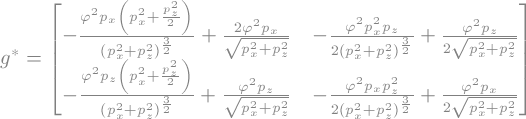

In [5]:
gstar_pxpz_eqn = gmeq.gstar_varphi_pxpz_eqn.subs({varphi_r:varphi})
gstar_pxpz_eqn

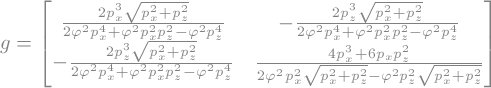

In [6]:
g_pxpz_eqn = Eq(g, gstar_pxpz_eqn.rhs.inv())
g_pxpz_eqn

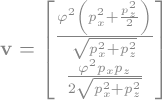

In [7]:
gmeq.rdot_vec_eqn.subs({eta:gmeq.eta, varphi_r:varphi})

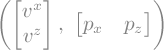

In [8]:
v_vec = Matrix([rdotx,rdotz])
p_covec = Matrix([px,pz]).T
v_vec,p_covec

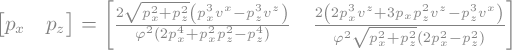

In [9]:
pcovec_eqn = Eq(p_covec, simplify(g_pxpz_eqn.rhs*v_vec).T)
pcovec_eqn

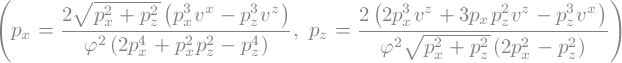

In [10]:
Eq(pcovec_eqn.lhs[0],pcovec_eqn.rhs[0]), Eq(pcovec_eqn.lhs[1],pcovec_eqn.rhs[1])

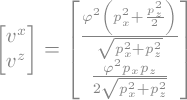

In [11]:
vvec_eqn = Eq(v_vec, simplify(p_covec*gstar_pxpz_eqn.rhs).T)
vvec_eqn

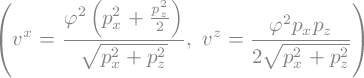

In [12]:
vx_px_pz_eqn = Eq(vvec_eqn.lhs[0],vvec_eqn.rhs[0])
vz_px_pz_eqn = Eq(vvec_eqn.lhs[1],vvec_eqn.rhs[1])
vx_px_pz_eqn, vz_px_pz_eqn

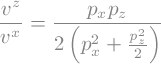

In [13]:
vzvx_ratio_eqn = Eq(vz_px_pz_eqn.lhs/vx_px_pz_eqn.lhs, vz_px_pz_eqn.rhs/vx_px_pz_eqn.rhs)
vzvx_ratio_eqn

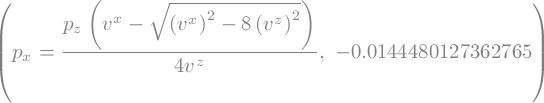

In [14]:
px_interim_solns = solve(vzvx_ratio_eqn,px)
px_interim_soln = px_interim_solns[0]
px_interim_eqn = Eq(px, px_interim_soln)
px_interim_eqn, N(((px_interim_soln).subs({rdotx:0.9,rdotz:0.01}).subs({pz:-1.3})))

## Expressions for $p_x(v^x,v^z)$ and $p_z(v^x,v^z)$ 

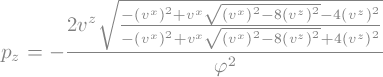

In [15]:
pzsqrd_vx_vz_eqn = Eq(pz**2, simplify( solve(vx_px_pz_eqn.subs(e2d(px_interim_eqn)), pz**2)[0] ))
pz_vx_vz_eqn = Eq(pz,-sqrt(pzsqrd_vx_vz_eqn.rhs)).subs({Abs(rdotz):rdotz})
pz_vx_vz_eqn

In [16]:
# tmp = (pz_vx_vz_eqn.rhs.args[3].args[0]).subs({rdotx:vx,rdotz:vz})
# tmp

In [17]:
# simplify( expand( (numer(tmp)*(vx-sqrt(vx**2-8*vz**2))) )/expand( (denom(tmp)*(vx-sqrt(vx**2-8*vz**2))) ) )

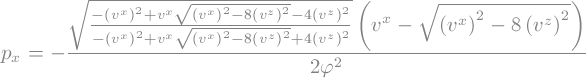

In [18]:
px_vx_vz_eqn = (px_interim_eqn.subs(e2d(pz_vx_vz_eqn)))
px_vx_vz_eqn

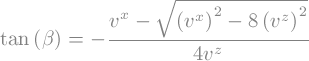

In [19]:
tanbeta_eqn = Eq(tan(beta), -px_vx_vz_eqn.rhs/pz_vx_vz_eqn.rhs)
tanbeta_eqn

In [20]:
# pxsqrd_interim_eqn = Eq(px_interim_eqn.lhs**2,px_interim_eqn.rhs**2)
# pxsqrd_interim_eqn

In [21]:
# pxsqrd_vx_vz_eqn = factor(pxsqrd_interim_eqn.subs(e2d(pzsqrd_vx_vz_eqn)))
# pxsqrd_vx_vz_eqn

In [22]:
# px_vx_vz_eqn = factor(Eq(sqrt(pxsqrd_vx_vz_eqn.lhs),sqrt(pxsqrd_vx_vz_eqn.rhs)).subs({Abs(px):px}))
# px_vx_vz_eqn

In [23]:
# factor(vz_px_pz_eqn.subs(e2d(pzsqrd_vx_vz_eqn)))

In [24]:
# px_vx_vz_solns = solve(vz_px_pz_eqn.subs(e2d(pzsqrd_vx_vz_eqn)),px)
# px_vx_vz_soln = simplify(px_vx_vz_solns[0]).subs(e2d(pz_vx_vz_eqn))
# px_vx_vz_eqn = Eq(px, px_vx_vz_soln)
# px_vx_vz_eqn

In [25]:
px_vx_vz_lambda = lambda f,vx,vz:  Abs(N(px_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz})))
pz_vx_vz_lambda = lambda f,vx,vz: -Abs(N(pz_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz})))

## Lagrangian $L(v^x,v^z,\varphi)$ using $p(v)$ mappings and Legendre transform

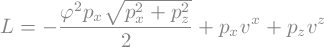

In [26]:
L_prelim_eqn = simplify(Eq(L, px*rdotx + pz*rdotz 
                           - gmeq.H_eqn.rhs.subs({varphi_r:varphi, eta:gmeq.eta})))
L_prelim_eqn

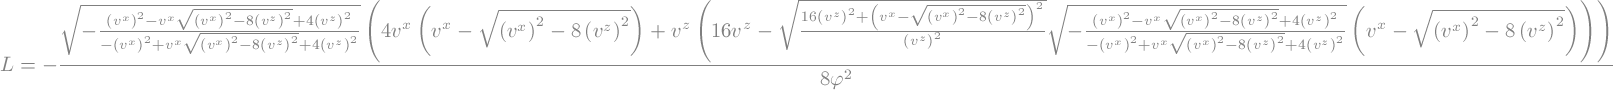

In [27]:
if gmeq.eta<1:
    L_interim_eqn = simplify( ((factor(L_prelim_eqn.subs({px:-pz*tan(beta)}))).subs(e2d(tanbeta_eqn))
        .subs(e2d(px_vx_vz_eqn))).subs(e2d(pz_vx_vz_eqn)) )#.subs({rdotz:-Abs(rdotz)})
else:
    L_interim_eqn = simplify( ((factor(L_prelim_eqn.subs({px:-pz*tan(beta)}))).subs(e2d(tanbeta_eqn))
        .subs(e2d(px_vx_vz_eqn))).subs(e2d(pz_vx_vz_eqn)) ).subs({rdotz:Abs(rdotz)})
L_interim_eqn

In [28]:
# L_interim_eqn = (L_prelim_eqn.subs(e2d(px_vx_vz_eqn)).subs(e2d(pz_vx_vz_eqn)))
# L_interim_eqn

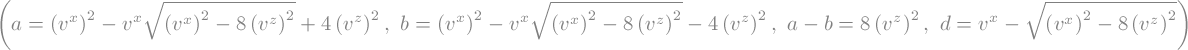

In [29]:
a = symbols(r'a',  real=True, positive=True)
b = symbols(r'b',  real=True, positive=True)
c = symbols(r'c',  real=True, positive=True)
d = symbols(r'd',  real=True, positive=True)
if gmeq.eta<1:
    a_subs_eqn = Eq(a, 
                    rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)+4*rdotz**2
                   )
    b_subs_eqn = Eq(b, 
                    rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)-4*rdotz**2
                   )
    c_subs_eqn = Eq(a-b, a_subs_eqn.rhs - b_subs_eqn.rhs)
    d_subs_eqn = Eq(d, 
                    rdotx-sqrt(rdotx**2-8*rdotz**2)
                   )
else:
    a_subs_eqn = Eq(a, 
                    rdotx-sqrt(rdotx**2-24*rdotz**2)
                   )
    b_subs_eqn = Eq(b, 
                    sqrt(a**2+16*rdotz**2)
                   )
    c_subs_eqn = Eq(a-b, a_subs_eqn.rhs - b_subs_eqn.rhs)
    d_subs_eqn = Eq(d, 
                    sqrt(a**2+16*rdotz**2)
                   )
a_subs_eqn, b_subs_eqn, c_subs_eqn, d_subs_eqn

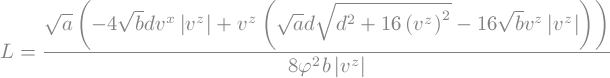

In [30]:
L_ab_eqn = Eq( L, simplify(simplify( (L_interim_eqn.rhs)
                                   .subs(e2d(a_subs_eqn,do_flip=True)).subs(e2d(b_subs_eqn,do_flip=True)) )
                          .subs(e2d(c_subs_eqn,do_flip=False)).subs(e2d(d_subs_eqn,do_flip=True))) )
# L_ab_eqn = Eq( L, simplify(L_ab_eqn.rhs.subs({Abs(rdotz):-rdotz})))
L_ab_eqn

In [31]:
# L_ab_eqn.subs({sqrt((16*rdotz**2+(rdotx-sqrt(rdotx**2-8*rdotz**2)**2))/rdotz**2):})

In [32]:
vx = symbols(r'x',  real=True)
vz = symbols(r'z',  real=True)

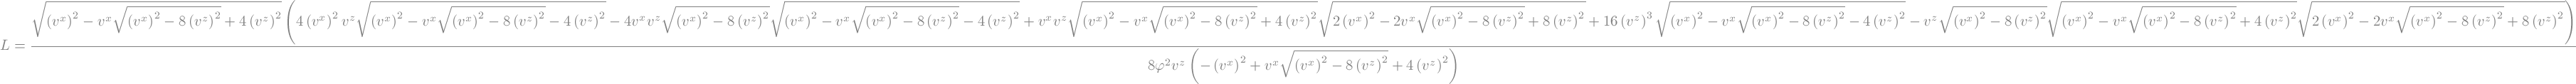

In [33]:
if gmeq.eta<1:
    L_eqn = factor(((
        L_ab_eqn.subs(e2d(a_subs_eqn,do_flip=False))
                .subs(e2d(b_subs_eqn,do_flip=False))
                .subs(e2d(d_subs_eqn,do_flip=False))
    )))
    L_eqn = ( L_eqn.subs({Abs(rdotz):-rdotz}) )
else:
    L_eqn = (((
        L_ab_eqn.subs(e2d(b_subs_eqn,do_flip=False))
                .subs(e2d(a_subs_eqn,do_flip=False))
                .subs(e2d(d_subs_eqn,do_flip=False))
    )))
    L_eqn = simplify( L_eqn.subs({Abs(rdotz):rdotz}) )
#     L_eqn = simplify( L_interim_eqn.subs({Abs(rdotz):rdotz}) )
L_eqn

## Lagrangian in compact form

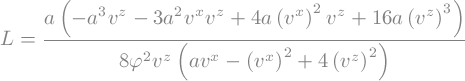

In [34]:
if gmeq.eta<1:
    a_subs_eqn = Eq(a, sqrt(rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)-4*rdotz**2))
    b_subs_eqn = Eq(a, sqrt(rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)+4*rdotz**2))
    b2_subs_eqn = Eq(a, sqrt(2*rdotx**2-2*rdotx*sqrt(rdotx**2-8*rdotz**2)+8*rdotz**2))
    c_subs_eqn = Eq(a, sqrt(rdotx**2-8*rdotz**2))
    L_compact_eqn = (L_eqn
                     .subs(e2d(a_subs_eqn,do_flip=True))
                     .subs(e2d(b_subs_eqn,do_flip=True))
                     .subs(e2d(b2_subs_eqn,do_flip=True))
                     .subs(e2d(c_subs_eqn,do_flip=True)) )
else:
    L_compact_eqn = L_eqn
L_compact_eqn

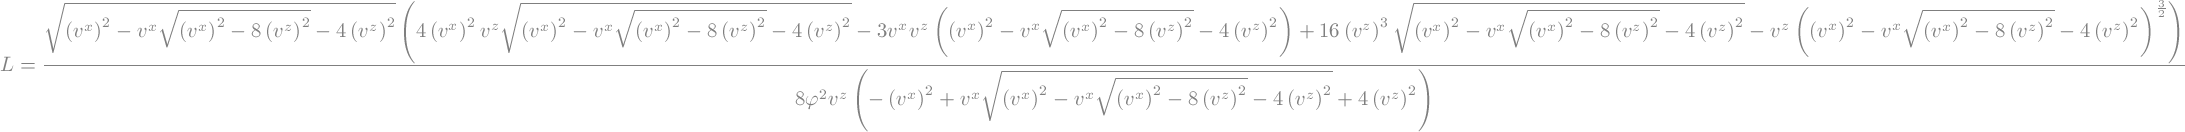

In [35]:
L_decompact_eqn = L_compact_eqn.subs(e2d(a_subs_eqn,do_flip=False))
L_decompact_eqn

In [36]:
L_lambda = lambda f,vx,vz: float(re(N(L_decompact_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))

# Test

In [37]:
varphi_ = 1

In [38]:
N(px_vx_vz_eqn.rhs.subs({rdotx:0.9,rdotz:-0.3,varphi:varphi_})), \
N(pz_vx_vz_eqn.rhs.subs({rdotx:0.9,rdotz:-0.3,varphi:varphi_}))

In [39]:
# N( L_eqn.subs({rdotx:0.9,rdotz:-0.3,varphi:varphi_}) )

In [40]:
vx_, vz_ = 0.9, -0.3
vx_, vz_

In [41]:
px_ = N(px_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_}).subs({varphi:varphi_}))
pz_ = N(pz_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_}).subs({varphi:varphi_}))
px_, pz_

In [42]:
px_ = px_vx_vz_lambda(varphi_,vx_,vz_)
pz_ = pz_vx_vz_lambda(varphi_,vx_,vz_)
px_, pz_

In [43]:
Matrix([px_,pz_]).dot(Matrix([vx_,vz_]))

In [44]:
# N(L_eqn.subs({varphi:varphi_,rdotx:vx_,rdotz:vz_})), L_lambda(varphi_,vx_,vz_)

# Plot

In [45]:
varphi_ = 1

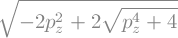

In [46]:
H_parametric_eqn = Eq((2*gmeq.H_eqn.rhs)**2,1).subs({varphi_r:varphi_, eta:gmeq.eta})
px_H_solns = [simplify(sqrt(soln)) for soln in solve( H_parametric_eqn ,px**2)]
pz_H_solns = [simplify(sqrt(soln)).subs({Abs(px):px}) for soln in solve( H_parametric_eqn ,pz**2)]
px_H_soln_ = [soln for soln in px_H_solns if Abs(sy.im(N(soln.subs({pz:1}))))<1e-10][0]
px_H_lambda = lambdify( [pz], simplify(px_H_soln_) )
numer(simplify(px_H_soln_))

In [47]:
pz_min_eqn = Eq(pz_min, 0)
px_min_eqn = Eq(px_min, 
                sqrt(solve(Eq((
                solve(Eq(4*gmeq.H_eqn.rhs**2,1).subs({varphi_r:varphi_,eta:gmeq.eta}),pz**2)[:])[0],0)
                               ,px**2)[1]))
tanbeta_max_eqn = Eq(tan(beta_max),sy.oo)
tanbeta_max = None
px_min_ = round(float(N(px_min_eqn.rhs.subs({varphi:varphi_}))),4)
pz_min_ = round(float(N(pz_min_eqn.rhs.subs({varphi:varphi_}))),8)
px_min_, -pz_min_, np.rad2deg(np.arctan(px_min_/pz_min_)) if pz_min_>0 else None

(1.0, -0.0, None)

In [48]:
v_from_gstar_lambda_tmp = lambdify((px,pz),
                N(gmeq.gstar_varphi_pxpz_eqn.subs({varphi_r:varphi_}).rhs*Matrix([px,pz])))
v_from_gstar_lambda = lambda px_,pz_: (v_from_gstar_lambda_tmp(px_,pz_)).flatten()
v_lambda = lambda pa: np.array([(v_from_gstar_lambda(px_,pz_)) for px_,pz_ in pa])
# gmeq.gstar_varphi_pxpz_eqn

In [49]:
if gmeq.eta==Rational(3,2):
    pz_max_ = 10**4
else:
    pz_max_ = 50
pz_array = -10**np.linspace(np.log10(pz_min_ if pz_min_>0 else 1e-3), np.log10(pz_max_), 200)
px_array = px_H_lambda(pz_array)
p_array = np.vstack([px_array,pz_array]).T
p_array = p_array[np.isfinite(p_array[:,0]) & np.isfinite(p_array[:,1])]

modp_array = norm(p_array,axis=0)
tanbeta_crit = float(N(gmeq.tanbeta_crit_eqn.rhs.subs({eta:gmeq.eta})))

p_infc_array = p_array[np.abs(p_array[:,0]/p_array[:,1])<tanbeta_crit]
p_supc_array = p_array[np.abs(p_array[:,0]/p_array[:,1])>=tanbeta_crit]

v_infc_array = v_lambda(p_infc_array)
v_supc_array = v_lambda(p_supc_array)
v_array = v_lambda(p_array)

p_vx_vz_lambda = lambda f,v: [px_vx_vz_lambda(f,v[0],v[1]),pz_vx_vz_lambda(f,v[0],v[1])]

p_from_v_array = np.array([p_vx_vz_lambda(varphi_,v_) for v_ in v_array[::1]])
len(p_from_v_array), len(p_array)

In [50]:
# p_trunc1_array = p_from_v_array[1:]
# p_trunc0_array = p_from_v_array[:-1]
# p_trunc1_array-p_trunc0_array
# p_trunc_array = p_trunc0_array[(p_trunc1_array[:,0]-p_trunc0_array[:,0])<0]
p_trunc_array = p_from_v_array

In [51]:
p_from_v_infc_array = p_trunc_array[np.abs(p_trunc_array[:,0]/p_trunc_array[:,1])<tanbeta_crit]
p_from_v_supc_array = p_trunc_array[np.abs(p_trunc_array[:,0]/p_trunc_array[:,1])>=tanbeta_crit]

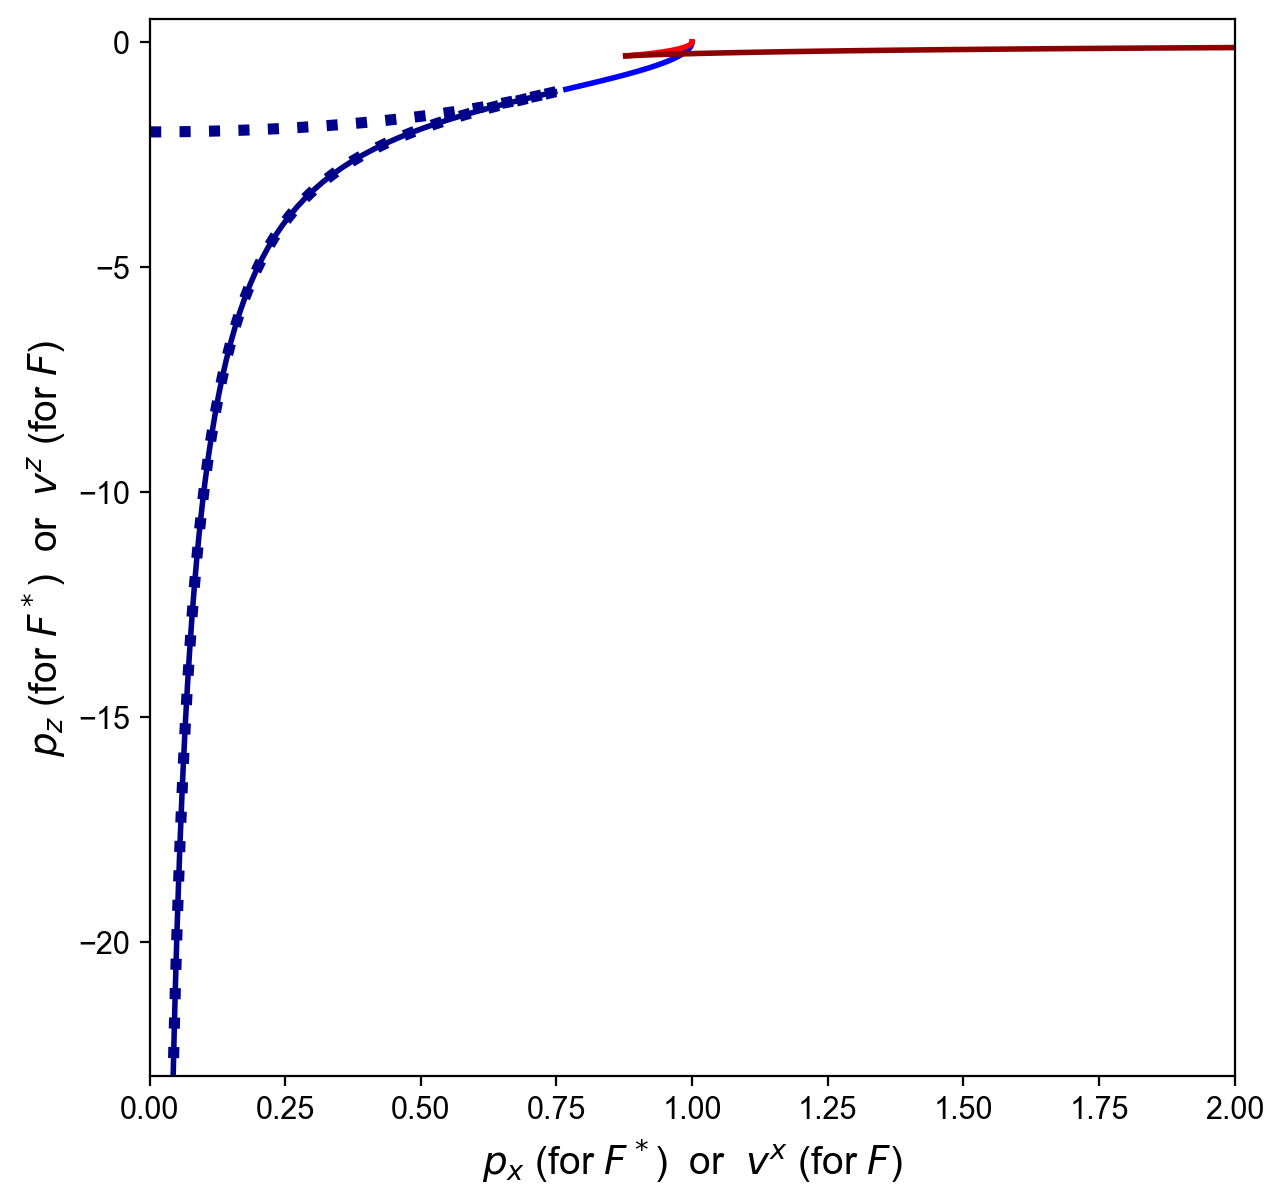

In [52]:
fig = gr.create_figure(job_name+'_Fstar_F_rectlinear', fig_size=(7,7))
plt.plot(p_supc_array[:,0],p_supc_array[:,1], 'Blue', lw=2, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta\geq\beta_\mathrm{c}$')
plt.plot(p_infc_array[:,0],p_infc_array[:,1], 'DarkBlue', lw=2, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta<\beta_\mathrm{c}$')

plt.plot(p_from_v_supc_array[:,0],p_from_v_supc_array[:,1], 'Blue', lw=4, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta\geq\beta_\mathrm{c}$')
plt.plot(p_from_v_infc_array[:,0],p_from_v_infc_array[:,1], 'DarkBlue', lw=4, ls=':', 
         label=r'$F^*\!\!=1$,  $\beta<\beta_\mathrm{c}$')

plt.plot(v_supc_array[:,0],v_supc_array[:,1], 'Red', lw=2, ls='-', 
         label=r'$F=1$,  $\beta\geq\beta_\mathrm{c}$')
# plt.plot([0,vx_abcrit_],[0,vz_abcrit_], 
#          '-.', color='DarkRed', lw=1, label=r'$\alpha_{\mathrm{c}}$')
plt.plot(v_infc_array[:,0],v_infc_array[:,1], 'DarkRed', lw=2, 
         ls='-', 
         label=r'$F=1$,  $\beta<\beta_\mathrm{c}$')
plt.xlabel(r'$p_x$ (for $F^*$)  or  $v^x$ (for $F$)', fontsize=14)
plt.ylabel(r'$p_z$ (for $F^*$)  or  $v^z$ (for $F$)', fontsize=14)
plt.xlim(0,2)
plt.ylim(-23,0.5);

In [53]:
gmeq.eta